![SolidQ](https://www.solidq.com/wp-content/uploads/2015/06/Logo-SolidQ-Web.gif)

# Estadística Descriptiva para variables continuas

In [1]:
import pyodbc
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
server = 'tcp:solidqdemo.database.windows.net' 
database = 'AdventureWorksDW2017' 
username = 'adminsql' 
password = 'Puk02020#!' 
vTargetMail = "SELECT CustomerKey, Age, YearlyIncome,CommuteDistance,BikeBuyer FROM vTargetMail"
#Abrimos la conexion
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [3]:
TM = pd.read_sql(vTargetMail,cnxn)

In [4]:
#Estadística desriptiva básica
TM['Age'].describe()

count    18484.000000
mean        50.048366
std         11.527410
min         33.000000
25%         41.000000
50%         48.000000
75%         58.000000
max        103.000000
Name: Age, dtype: float64

In [5]:
TM['Age'].mean()
TM['Age'].median()

48.0

In [7]:
#Midiendo la dispersión
#La forma más sencilla, es midiendo el rango
TM['Age'].max()-TM['Age'].min()

70

In [8]:
#utilizando el IQR(Inter-quartile range)
TM['Age'].quantile(0.75) - TM['Age'].quantile(0.25)

17.0

In [9]:
#Coeficiente de variación
TM['Age'].std() / TM['Age'].mean()

0.23032539560134546

In [10]:
#Skweness mide la asimetría en la distribución de probabilidad. Si es positiva la disitribución tiene un "long tail" a la derecha de la media
TM['Age'].skew()

0.7042259866264416

In [11]:
#Si la distribución tiene "long tails" en ambas partes - Kurtosis. Si es negativa indica que los tails son cortos
TM['Age'].kurt()

-0.03766923238585962

# Variables discretas

In [1]:
import pyodbc
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
server = 'tcp:solidqdemo.database.windows.net' 
database = 'AdventureWorksDW2017' 
username = 'adminsql' 
password = 'Puk02020#!' 
vTargetMail = "SELECT CustomerKey, TotalChildren, NumberChildrenAthome,Gender,HouseOwnerFlag,NumberCarsOwned, MaritalStatus, Age, YearlyIncome, \
    SpanishEducation AS Education, SpanishOccupation AS Occupation FROM vTargetMail"
#Abrimos la conexion
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [3]:
df=pd.read_sql(vTargetMail, cnxn)

In [4]:
df['Education'].value_counts()

Licenciatura                          5356
Estudios universitarios (en curso)    5064
Educación secundaria                  3294
Estudios de postgrado                 3189
Educación secundaria (en curso)       1581
Name: Education, dtype: int64

In [5]:
#Definirlo como ordinal
df['Education'] = df['Education'].astype('category')
df['Education'].cat.reorder_categories(["Educación secundaria (en curso)","Educación secundaria","Estudios universitarios (en curso)","Licenciatura","Estudios de postgrado"],inplace=True)
df['EducationInt'] = df['Education'].cat.codes
df['Education'].value_counts().sort_index()

Educación secundaria (en curso)       1581
Educación secundaria                  3294
Estudios universitarios (en curso)    5064
Licenciatura                          5356
Estudios de postgrado                 3189
Name: Education, dtype: int64

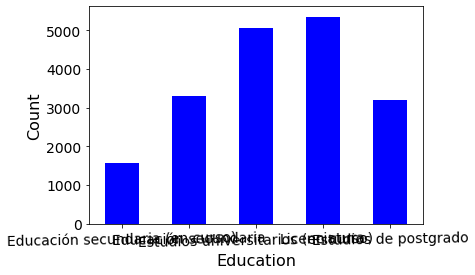

In [13]:
edu=df['Education'].value_counts().sort_index()
ax=edu.plot(kind='bar',color=('b'),fontsize=14, legend=False,use_index=True,rot=1)
ax.set_xlabel('Education',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
plt.show()

# Mostrar asociaciones gráficamente

In [6]:
TM1= df.head(200)

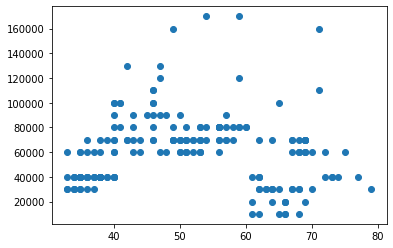

In [7]:
plt.scatter(TM1['Age'],TM1['YearlyIncome'])
plt.show()

# Datos Categóricos

In [0]:
import pandas as pd
df = pd.DataFrame([
  ['verde', 'M', 10.1, 'clase1'],
  ['rojo', 'L', 13.5, 'clase2'],
   ['azul', 'XL', 15.3, 'clase1']])
df.columns = ['color', 'talla', 'precio', 'clase']
df
#característica nominal, el color, una ordinal la talla y una numérica, el precio

# Mapear Características ordinales
Para asegurarnos de que el algoritmo de aprendizaje interpreta las características ordinales correctamente, necesitamos convertir las cadenas de caracteres categóricas en enteros. Desafortunadamente aún no hemos visto una función que nos permita hacerlo automáticamente, derivando el orden correcto de las etiquetas de nuestra caractarística, por lo que vamos a definirlo manualmente. En el siguiente ejemplo, asumimos que sabemos la diferencia numérica entre las características, por ejemplo: XL = L +1 = M + 2:

In [0]:
size_mapping = {'XL': 3,'L': 2,'M': 1}
df['talla'] = df['talla'].map(size_mapping)
df

más tarde, podemos simplemente definir un diccionario de mapeo inverso inv_size_mapping = {v: k for k, v in size_mapping.items()} 
que puede utilizarse con el método map en la característica transformada, similar a lo que hemos hecho anteriormente

In [0]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['talla'].map(inv_size_mapping)

# Codificando etiquetas de clases
Muchas librerías de ML requieren que las etiquetas de las clases estén codificadas como valores enteros. Aunque muchos estimadores de clasificación en scikit-learn convierten las etiquetas en enteros internamente, está considerado como una buena práctica, proporcionanrlas directamente como un array de enteros para evitar problemas. Para codificar las etiquetas, podemos utilizar una aproximación similar al mapeo de características ordinales que hemos visto. Tenemos que recordar que las etiquetas de clases no son ordinales, por lo que no importa que valor entero les asignemos. Podemos simplemente enumerarlas comenzando en 0

In [0]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['clase']))}
class_mapping

In [0]:
df['clase'] = df['clase'].map(class_mapping)
df

In [0]:
#Vuelta atrás
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['clase'] = df['clase'].map(inv_class_mapping)
df

Podemos utilizar la clase LabelEncoder del paquete scikit-learn para hacer este trabajo directamente, pero esto lo veremos en detalle en el siguiente tema

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['clase'].values)
y


# Discretizando variables continuas

In [10]:
#Con el mismo ancho. Abiertas por laizquierda
TM1['Edad'] = pd.cut(TM1['Age'],5)
TM1['Edad'].value_counts()

c:\users\asoto\azuredatastudio-python\0.0.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(32.954, 42.2]    67
(60.6, 69.8]      46
(42.2, 51.4]      40
(51.4, 60.6]      35
(69.8, 79.0]      12
Name: Edad, dtype: int64

In [11]:
#Si queremos hacerlos de igual alto
TM1['Edad2'] = pd.qcut(TM1['Age'],5)
TM1['Edad2'].value_counts(sort=False)

c:\users\asoto\azuredatastudio-python\0.0.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(32.999, 38.0]    46
(38.0, 46.0]      36
(46.0, 54.0]      39
(54.0, 65.0]      41
(65.0, 79.0]      38
Name: Edad2, dtype: int64

In [14]:
#Personalizado
custombins = [16,22,29,39,54,88]
TM1['Edad3']=pd.cut(TM1['Age'],custombins)
TM1['Edad3'].value_counts(sort=False)

c:\users\asoto\azuredatastudio-python\0.0.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(16, 22]     0
(22, 29]     0
(29, 39]    49
(39, 54]    72
(54, 88]    79
Name: Edad3, dtype: int64